In [17]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

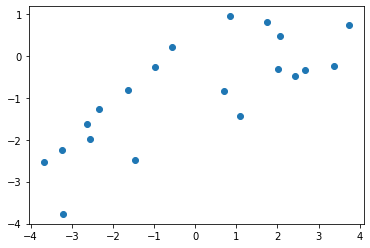

In [18]:
N = 20 

X = np.random.random(N) * 10-5

Y = 0.5 * X - 1 + np.random.randn(N)

plt.scatter(X, Y)

In [19]:
print(X)
print(Y)

[ 2.05553851 -3.22225516  3.37813169 -3.67136686 -2.33286303 -1.64275951
  0.69578544 -1.45870977  1.07881863 -2.64106911 -2.54893041 -0.55410682
  2.01249472  2.42437306  0.85090809 -0.98762829  2.66903741  3.72674881
  1.74253444 -3.24254335]
[ 0.48453482 -3.77017484 -0.24110663 -2.52521364 -1.25844704 -0.81817746
 -0.82851634 -2.48173996 -1.44289619 -1.62624751 -1.99308685  0.21196346
 -0.31195759 -0.48606691  0.94845875 -0.27330854 -0.32489648  0.74199277
  0.80150297 -2.24238622]


In [20]:
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

In [21]:
inputs = torch.from_numpy(X.astype(np.float32))

In [22]:
targets = torch.from_numpy(Y.astype(np.float32))

In [23]:
model = nn.Linear(1, 1)

In [24]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [25]:
#Training Loop
n_epochs = 30
losses = []
for i in range(n_epochs):
  
  optimizer.zero_grad()

  outputs = model(inputs)
  loss = criterion(outputs, targets)
  losses.append(loss.item())

  #Backward
  loss.backward()
  optimizer.step()

  print(f"Epochs {i+1}/{n_epochs}, Loss: {loss.item():.4f}")


Epochs 1/30, Loss: 3.0024
Epochs 2/30, Loss: 2.6592
Epochs 3/30, Loss: 2.3821
Epochs 4/30, Loss: 2.1576
Epochs 5/30, Loss: 1.9748
Epochs 6/30, Loss: 1.8251
Epochs 7/30, Loss: 1.7018
Epochs 8/30, Loss: 1.5995
Epochs 9/30, Loss: 1.5140
Epochs 10/30, Loss: 1.4419
Epochs 11/30, Loss: 1.3807
Epochs 12/30, Loss: 1.3282
Epochs 13/30, Loss: 1.2826
Epochs 14/30, Loss: 1.2428
Epochs 15/30, Loss: 1.2077
Epochs 16/30, Loss: 1.1764
Epochs 17/30, Loss: 1.1483
Epochs 18/30, Loss: 1.1228
Epochs 19/30, Loss: 1.0995
Epochs 20/30, Loss: 1.0780
Epochs 21/30, Loss: 1.0582
Epochs 22/30, Loss: 1.0397
Epochs 23/30, Loss: 1.0225
Epochs 24/30, Loss: 1.0063
Epochs 25/30, Loss: 0.9910
Epochs 26/30, Loss: 0.9766
Epochs 27/30, Loss: 0.9629
Epochs 28/30, Loss: 0.9499
Epochs 29/30, Loss: 0.9375
Epochs 30/30, Loss: 0.9257


In [26]:
losses

[3.0023841857910156,
 2.6591577529907227,
 2.382131576538086,
 2.1576132774353027,
 1.9747841358184814,
 1.8250906467437744,
 1.7017717361450195,
 1.5994802713394165,
 1.5139868259429932,
 1.4419426918029785,
 1.3806979656219482,
 1.3281526565551758,
 1.2826417684555054,
 1.2428443431854248,
 1.2077105045318604,
 1.1764060258865356,
 1.1482659578323364,
 1.122759461402893,
 1.099462866783142,
 1.078035831451416,
 1.0582048892974854,
 1.039749026298523,
 1.0224900245666504,
 1.006282091140747,
 0.9910058975219727,
 0.9765636324882507,
 0.9628738164901733,
 0.9498686790466309,
 0.9374908208847046,
 0.9256917238235474]

In [27]:
outputs = model(inputs)

In [28]:
print(outputs)

tensor([[ 0.4985],
        [-1.6083],
        [ 1.0264],
        [-1.7876],
        [-1.2533],
        [-0.9778],
        [-0.0443],
        [-0.9043],
        [ 0.1086],
        [-1.3763],
        [-1.3395],
        [-0.5433],
        [ 0.4813],
        [ 0.6457],
        [ 0.0176],
        [-0.7163],
        [ 0.7434],
        [ 1.1656],
        [ 0.3735],
        [-1.6164]], grad_fn=<AddmmBackward0>)


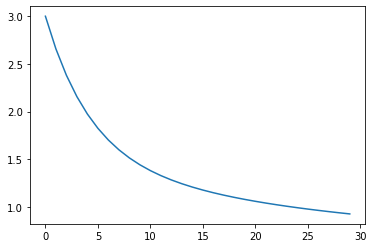

In [30]:
plt.plot(losses)

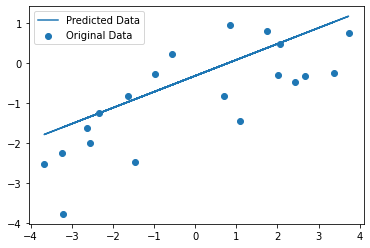

In [31]:
predictions = model(inputs).detach().numpy()
plt.scatter(X, Y, label="Original Data")
plt.plot(X, predictions, label="Predicted Data")
plt.legend()
plt.show()